In [141]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-08 19:13:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving webproxy (webproxy)... 10.36.40.1
Connecting to webproxy (webproxy)|10.36.40.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.01s   

2019-09-08 19:13:08 (2.01 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas

#### pd.to_datetime(): convierte los datos en año-mes-día

In [143]:
dftime = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5]})

In [144]:
dftime.head()

,year,month,day
0,2015,2,4
1,2016,3,5


In [145]:
dftime = pd.to_datetime(dftime)
dftime.head()

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

#### dp.dayoftheweek(): devuelve el día de la semana de la fecha (1-7)

In [146]:
s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
s.head(9)

2016-12-31   2016-12-31
2017-01-01   2017-01-01
2017-01-02   2017-01-02
2017-01-03   2017-01-03
2017-01-04   2017-01-04
2017-01-05   2017-01-05
2017-01-06   2017-01-06
2017-01-07   2017-01-07
2017-01-08   2017-01-08
Freq: D, dtype: datetime64[ns]

In [147]:
s.dt.dayofweek

2016-12-31    5
2017-01-01    6
2017-01-02    0
2017-01-03    1
2017-01-04    2
2017-01-05    3
2017-01-06    4
2017-01-07    5
2017-01-08    6
Freq: D, dtype: int64

# Data set up


In [148]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [149]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [150]:
df.shape

(346, 10)

# Data exploration

In [151]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [152]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [153]:
#Verlo en porcentajes

df['loan_status'].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

In [154]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

In [155]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [156]:
df.groupby('Gender')['Gender'].count().to_frame()

,Gender
Gender,
female,52
male,294


In [1]:
viz = df[['age','Principal']]
viz.hist()
plt.show()

NameError: name 'df' is not defined

In [2]:
df.head()

NameError: name 'df' is not defined

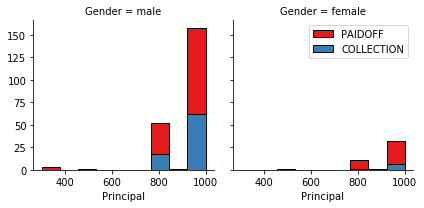

In [158]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


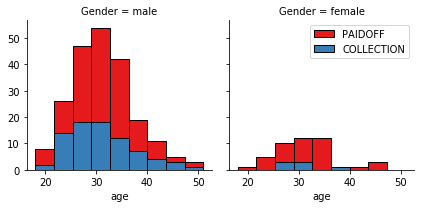

In [159]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre processing

### Convertir en datatime object 

In [160]:
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### El día de la semana que la gente pide el préstamo

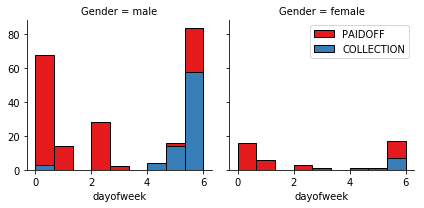

In [161]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### Agregar dos columnas: dayoftheweek y weekends

**La gente que pide el préstamo al final de la semana es la que menos paga.**

In [162]:
df.head(2) #Se agregó dayofweek

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3


In [163]:
#Agregar columna weekend si el día es mayor que 3 (jueves)

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0) 
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Convertir Categorial features to Numerical valores

#### Columna binaria Gender

In [164]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

*El 86% de mujeres paga sus deudas. De hombres sólo el 73%*

In [165]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0


#### Agregar columnas education

In [166]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [167]:
df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college


In [168]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


Como sólo hay 2 personas haciendo haciendo master, eliminamos esa columna

In [169]:
Feature.drop(['Master or Above'],axis=1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [170]:
Feature.shape

(346, 8)

# Normalize Data

**COLLECTION: 0
PAIDOFF     : 1**

In [171]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'],value=[0,1],inplace=True)

In [172]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [173]:
X = Feature.values
print(type(X))

y = df['loan_status'].values

<class 'numpy.ndarray'>


In [174]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Train Test Split

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# Modeling

## 1) KNN Neighbor algorithm

#### k = 4

In [176]:
from sklearn.neighbors import KNeighborsClassifier

#Train 

k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#Test

yhat = neigh.predict(X_test)

In [177]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857


#### Varios ks

In [178]:
Ks=10
Ks_neigh=np.zeros((Ks-1))

for i in range(1,Ks):
    
    neigh=KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    Ks_neigh[i-1]=metrics.accuracy_score(y_test,yhat)
    
Ks_neigh

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

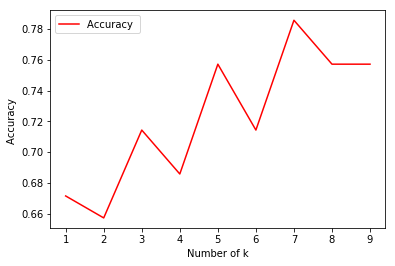

In [179]:
plt.plot(range(1,Ks),Ks_neigh,'r')  
plt.ylabel('Accuracy ')
plt.xlabel('Number of k')
plt.legend(('Accuracy ', ''))
plt.show()

#### Elijo k = 7

In [180]:
#Train 

k = 7

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#Test

yhat = neigh.predict(X_test)

In [181]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


#### Evaluation of Accuracy

In [182]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [183]:
print("Jaccard:", jaccard_similarity_score(y_test,yhat))
print("F1-score:", f1_score(y_test, yhat, average='weighted'))

Jaccard: 0.7857142857142857
F1-score: 0.7766540244416351


In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.84      0.89      0.87        55

   micro avg       0.79      0.79      0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



## 2) Decision Tree 

#### max_depth = 4

In [185]:
from sklearn.tree import DecisionTreeClassifier

#Train

tree_loan = DecisionTreeClassifier(criterion='entropy',max_depth = 4).fit(X_train,y_train)

#Test

yhat_tree = tree_loan.predict(X_test)

In [186]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train,tree_loan.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Train set Accuracy:  0.7463768115942029
Test set Accuracy:  0.6142857142857143


#### Varias max_depth

In [187]:
depth=10
depth_tree=np.zeros((depth-1))

for i in range(1,depth):
    
    tree_loan = DecisionTreeClassifier(criterion='entropy',max_depth = i).fit(X_train,y_train)
    yhat_tree = tree_loan.predict(X_test)
    depth_tree[i-1]=metrics.accuracy_score(y_test,yhat_tree)
    
depth_tree

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286])

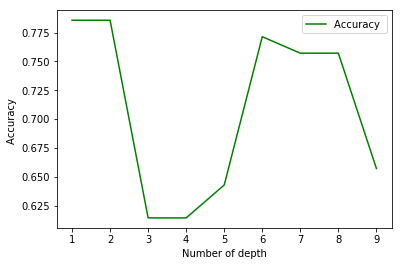

In [188]:
plt.plot(range(1,depth),depth_tree,'g')  
plt.ylabel('Accuracy ')
plt.xlabel('Number of depth')
plt.legend(('Accuracy ', ''))
plt.show()

#### Choose max_deph =6

In [189]:
#Train

tree_loan = DecisionTreeClassifier(criterion='entropy',max_depth = 6).fit(X_train,y_train)

#Test

yhat_tree = tree_loan.predict(X_test)

In [190]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train,tree_loan.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.7714285714285715


#### Evaluation of Accuracy

In [191]:
print("Jaccard:", jaccard_similarity_score(y_test,yhat_tree))
print("F1-score:", f1_score(y_test, yhat_tree, average='weighted'))

Jaccard: 0.7714285714285715
F1-score: 0.7064793130366899


In [192]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.79      0.96      0.87        55

   micro avg       0.77      0.77      0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70



## 3) Support Vector Machine

In [193]:
from sklearn import svm

#Train

svm_loan = svm.SVC().fit(X_train, y_train) 

#Test

yhat_svm = svm_loan.predict(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [194]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train,svm_loan.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

Train set Accuracy:  0.782608695652174
Test set Accuracy:  0.7428571428571429


#### Evaluation of Accuracy

In [195]:
print("Jaccard:", jaccard_similarity_score(y_test,yhat_svm))
print("F1-score:", f1_score(y_test, yhat_svm, average='weighted'))

Jaccard: 0.7428571428571429
F1-score: 0.7275882012724117


In [196]:
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



## 4) Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression

#Train

lr_loan = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

#Test

yhat_lr = lr_loan.predict(X_test)

#Prob

yhat_lr_prob = lr_loan.predict_proba(X_test)

In [211]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train,lr_loan.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

Train set Accuracy:  0.7572463768115942
Test set Accuracy:  0.6857142857142857


#### Evaluation of Accuracy

In [212]:
from sklearn.metrics import log_loss
print("Jaccard:", jaccard_similarity_score(y_test,yhat_lr))
print("F1-score:", f1_score(y_test, yhat_lr, average='weighted'))
print("Log Loss:", log_loss(y_test, yhat_lr_prob))

Jaccard: 0.6857142857142857
F1-score: 0.6670522459996144
Log Loss: 0.5772287609479654


In [213]:
print(classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.18      0.13      0.15        15
           1       0.78      0.84      0.81        55

   micro avg       0.69      0.69      0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



# Model Evaluation using Test set

In [201]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-08 19:13:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving webproxy (webproxy)... 10.36.40.1
Connecting to webproxy (webproxy)|10.36.40.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2019-09-08 19:13:22 (457 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [202]:
test_df=pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [203]:
#Datatime

test_df['effective_date']=pd.to_datetime(test_df['effective_date'])
test_df['due_date']=pd.to_datetime(test_df['due_date'])

#Dayofweek and weekend

test_df['dayofweek']=test_df['effective_date'].dt.dayofweek
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

#Categorical data

test_df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
Feature_test=test_df[['Principal','terms','age','Gender','weekend']]
Feature_test=pd.concat([Feature_test,pd.get_dummies(test_df['education'])],axis=1)
Feature_test.drop(['Master or Above'],axis=1,inplace=True)

In [204]:
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [205]:
#Normalize

X_TEST = Feature_test.values
print(type(X_TEST))

test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'],value=[0,1],inplace=True)

Y_TEST = test_df['loan_status'].values
print(type(Y_TEST))

X_TEST = preprocessing.StandardScaler().fit_transform(X_TEST)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [214]:
#K Nearest
yhat_neigh_test = neigh.predict(X_TEST)

#Decision Tree
yhat_tree_test = tree_loan.predict(X_TEST)

#SVM
yhat_svm_test = svm_loan.predict(X_TEST)

#Logistic Regression
yhat_lr_test = lr_loan.predict(X_TEST)

yhat_lr_test_prob = lr_loan.predict_proba(X_TEST)

In [215]:
print("KNN accuracy: ", metrics.accuracy_score(Y_TEST, yhat_neigh_test))
print("Decision Tree accuracy: ", metrics.accuracy_score(Y_TEST, yhat_tree_test))
print("SVM accuracy: ", metrics.accuracy_score(Y_TEST, yhat_svm_test))
print("Logistic Regression accuracy: ", metrics.accuracy_score(Y_TEST, yhat_lr_test))

KNN accuracy:  0.6666666666666666
Decision Tree accuracy:  0.7222222222222222
SVM accuracy:  0.7962962962962963
Logistic Regression accuracy:  0.7407407407407407


In [216]:
print("KNN Jaccard:", jaccard_similarity_score(Y_TEST,yhat_neigh_test))
print("KNN F1-score:", f1_score(Y_TEST,yhat_neigh_test, average='weighted'))
print("")
print("Decision Tree Jaccard:", jaccard_similarity_score(Y_TEST,yhat_tree_test))
print("Decision Tree F1-score:", f1_score(Y_TEST,yhat_tree_test, average='weighted'))
print("")
print("SVM Jaccard:", jaccard_similarity_score(Y_TEST,yhat_svm_test))
print("SVM Tree F1-score:", f1_score(Y_TEST,yhat_svm_test, average='weighted'))
print("")
print("Logistic Regression Jaccard:", jaccard_similarity_score(Y_TEST,yhat_lr_test))
print("Logistic Regression F1-score:", f1_score(Y_TEST,yhat_lr_test, average='weighted'))
print("Logistic Regression Log Loss:", log_loss(Y_TEST,yhat_lr_test_prob))

KNN Jaccard: 0.6666666666666666
KNN F1-score: 0.6328400281888654

Decision Tree Jaccard: 0.7222222222222222
Decision Tree F1-score: 0.6704776923582364

SVM Jaccard: 0.7962962962962963
SVM Tree F1-score: 0.7583503077293734

Logistic Regression Jaccard: 0.7407407407407407
Logistic Regression F1-score: 0.6604267310789049
Logistic Regression Log Loss: 0.5672153379912981


# Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.66    | 0.63     | NA      |
| Decision Tree      | 0.72    | 0.67     | NA      |
| SVM                | 0.80    | 0.76     | NA      |
| LogisticRegression | 0.74    | 0.66     | 0.57    |